In [2]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt

In [3]:
db = pd.read_csv('DNAArtigo.csv')

In [4]:
Test = db.sort_values(by='outdoor')

In [5]:
Test.to_csv('DNAArtigoSorted.csv', index=False)

In [6]:
x = min(Test['outdoor'])
x

0.9

In [7]:
y = max(Test['outdoor'])
y

233.14

In [8]:
x = Test['outdoor'].std()
x

37.46018384808503

In [9]:
x = Test['outdoor'].mean()
x

39.620049999999985

In [13]:
Test.head()

,outdoor
154,0.90
313,1.82
52,2.10
367,2.40
142,2.48


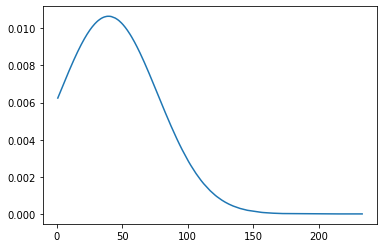

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

#x_axis = np.arange(0, 10, 0.001)
#normal com média 2,232 e variância 1.88, conforme planilha
plt.plot(Test, norm.pdf(Test,39.62,37.46))
plt.show()

In [16]:
from scipy import stats

import matplotlib.pyplot as plt

#dados = norm.rvs(size = 100)  #cria também um conjunto de 100 dados

#stats.probplot(Test, plot = plt)  #faz o plot dos dados

 

stats.shapiro(Test)  #faz o teste

(0.8228750228881836, 1.1347273336525237e-20)

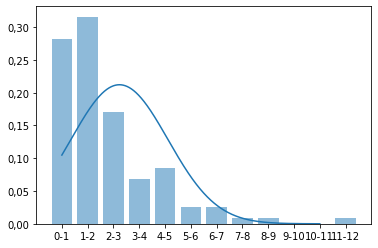

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df=pd.DataFrame({'frequencia_relativa': {'0-1': 0.282, '1-2': 0.316, '2-3': 0.171, '3-4': 0.068, '4-5': 0.085, '5-6': 0.026, '6-7': 0.026, '7-8': 0.009, '8-9': 0.009, '9-10': 0.0, '10-11': 0.0, '11-12': 0.009}})
df=df.reindex(['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7',
       '7-8', '8-9', '9-10', '10-11', '11-12'])

fig, ax=plt.subplots()
ax.bar(x=df.index, height=df.frequencia_relativa, alpha=0.5)
ax.set_yticklabels(["{:.2f}".format(k).replace(".",",") for k in np.arange(0.,0.35,0.05)])

x_axis = np.arange(0, 10, 0.001)
#normal com média 2,232 e variância 1.88, conforme planilha
plt.plot(x_axis, norm.pdf(x_axis,2.232,1.88))
plt.show()

Text(0, 0.5, 'Probability Density')

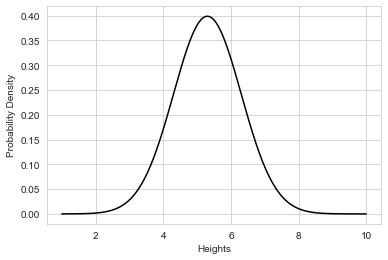

In [17]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
#Visualizing the distribution
 
sb.set_style('whitegrid')
sb.lineplot(data, pdf , color = 'black')
plt.xlabel('Heights')
plt.ylabel('Probability Density')

In [18]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(1,10,0.01)
pdf = norm.pdf(data , loc = 5.3 , scale = 1 )
 
#Probability of height to be under 4.5 ft.
prob_1 = norm(loc = 5.3 , scale = 1).cdf(4.5)
print(prob_1)
 
#probability that the height of the person will be between 6.5 and 4.5 ft.
 
cdf_upper_limit = norm(loc = 5.3 , scale = 1).cdf(6.5)
cdf_lower_limit = norm(loc = 5.3 , scale = 1).cdf(4.5)
 
prob_2 = cdf_upper_limit - cdf_lower_limit
print(prob_2)
 
#probability that the height of a person chosen randomly will be above 6.5ft
 
cdf_value = norm(loc = 5.3 , scale = 1).cdf(6.5)
prob_3 = 1- cdf_value
print(prob_3)

0.21185539858339675
0.673074931194895
0.11506967022170822


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline
# define constants
mu = 998.8 
sigma = 73.10
x1 = 900
x2 = 1100
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

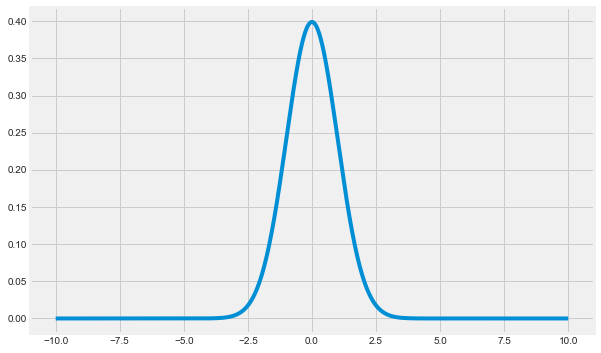

In [24]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)


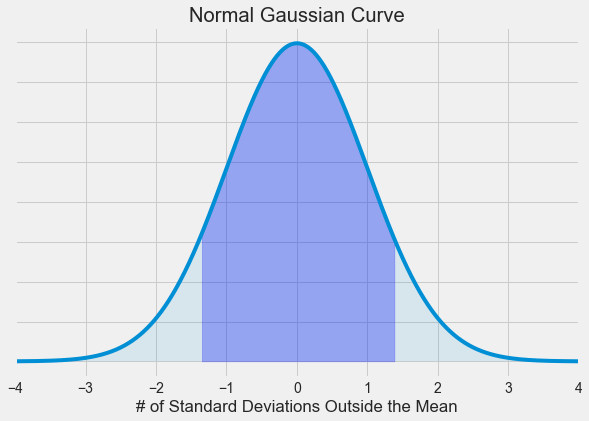

In [27]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()

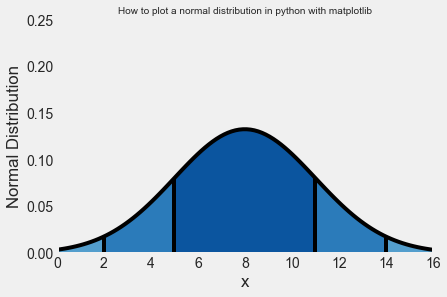

In [28]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np


x_min = 0.0
x_max = 16.0

mean = 8.0 
std = 3.0

x = np.linspace(x_min, x_max, 100)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

#----------------------------------------------------------------------------------------#
# fill area 1

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 2

pt1 = mean + std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 3

pt1 = mean - std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 2.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#2b7bba', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 4

pt1 = mean + 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 5

pt1 = mean - 2.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 3.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#539ecd', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 6

pt1 = mean + 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean + 10.0 *std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#
# fill area 7

pt1 = mean - 3.0 * std
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='black')

pt2 = mean - 10.0 * std
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,mean,std)

plt.fill_between(ptx, pty, color='#89bedc', alpha='1.0')

#----------------------------------------------------------------------------------------#

plt.grid()

plt.xlim(x_min,x_max)
plt.ylim(0,0.25)

plt.title('How to plot a normal distribution in python with matplotlib',fontsize=10)

plt.xlabel('x')
plt.ylabel('Normal Distribution')

plt.savefig("normal_distribution_2.png")
plt.show()

In [29]:
from scipy.stats import norm
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

0.3085375387259869


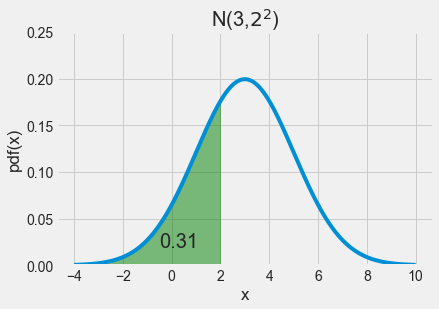

In [30]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='g')
# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

In [37]:
from scipy.stats import norm
lessthan150=norm.cdf(x=100, loc=39.62, scale=37.46)
print(lessthan150)

0.9465029952357915


In [38]:
x = Test

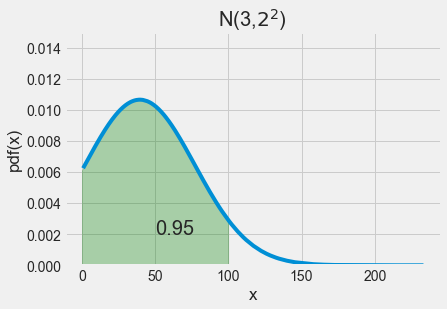

In [43]:
fig, ax = plt.subplots()
# for distribution curve
#x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=39.62,scale=37.46))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(0,100,0.01)
ax.set_ylim(0,0.015)
ax.fill_between(px,norm.pdf(px,loc=39.62,scale=37.46),alpha=0.3, color='g')
# for text
ax.text(50,0.002,round(lessthan150,2), fontsize=20)
plt.show()